<a href="https://colab.research.google.com/github/Sandeepkumar607/Safety_Model/blob/main/oil_spill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install xformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 17.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinu

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (145 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["metallic tones of the plant. reflections from the overhead lights can be seen in the oil, adding to the realism of the spill. in the foreground, a caution sign is placed near the spill, but it's partially obscured by the spreading oil. the atmosphere is gritty and industrial, emphasizing the urgency and potential danger of the situation."]


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as OIL_SPILL_0.png


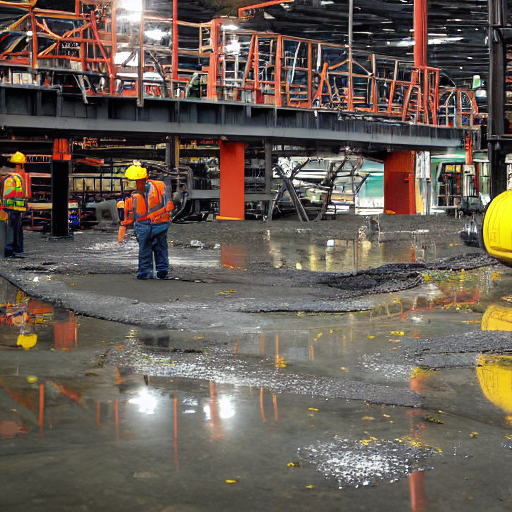

In [ ]:
# Import required libraries
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Authenticate with Hugging Face (if needed for private or gated models)
from huggingface_hub import login

# Login to Hugging Face with your token (uncomment the line below and replace YOUR_HUGGING_FACE_TOKEN with your actual token)
# login(token="YOUR_HUGGING_FACE_TOKEN")

# Define the model ID for Stable Diffusion v1-5
model_id = "runwayml/stable-diffusion-v1-5"

# --- Load and Configure the Model ---

# Load the model and set it to use half precision (fp16) and the GPU
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16  # Use 16-bit floating point precision for memory efficiency
)

# Move the pipeline to the GPU
pipe = pipe.to("cuda")

# Enable memory-efficient attention (requires xformers library)
pipe.enable_xformers_memory_efficient_attention()

# Define the prompt for the image generation
prompt = (
    "A detailed scene of a lubrication oil spill in a bustling steel plant environment. The spill covers a large area on the factory floor, creating a shiny, slippery surface. Workers in the background are wearing safety gear and operating heavy machinery, unaware of the hazard. Large steel structures and industrial equipment surround the scene. The oil's dark color contrasts with the gray and metallic tones of the plant. Reflections from the overhead lights can be seen in the oil, adding to the realism of the spill. In the foreground, a caution sign is placed near the spill, but it's partially obscured by the spreading oil. The atmosphere is gritty and industrial, emphasizing the urgency and potential danger of the situation."
)

# --- Generate and Display the Image ---

# Generate the image(s)
try:
    with torch.autocast("cuda"):  # Use mixed precision for faster and memory-efficient generation
        images = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images  # Custom steps and guidance scale for better results

    # Display and save the generated images
    for i, img in enumerate(images):
        img.show()  # Display the image
        filename = f"OIL_SPILL_{i}.png"
        img.save(filename)  # Save the image to a file
        print(f"Image saved as {filename}")

except Exception as e:
    print(f"An error occurred during image generation: {e}")

# Optional: Function to display images inline in Jupyter Notebooks or Colab
def display_images(images):
    from IPython.display import display
    for img in images:
        display(img)

# Display the images inline if running in a Jupyter environment
display_images(images)


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (127 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of the environment. reflections from overhead lights should be visible in the oil, adding to the realism. a caution sign should be placed near the spill, partially obscured by the spreading oil. the atmosphere should convey a sense of urgency and potential danger.']


  0%|          | 0/100 [00:00<?, ?it/s]

Image saved as OIL_SPILL_1_0.png


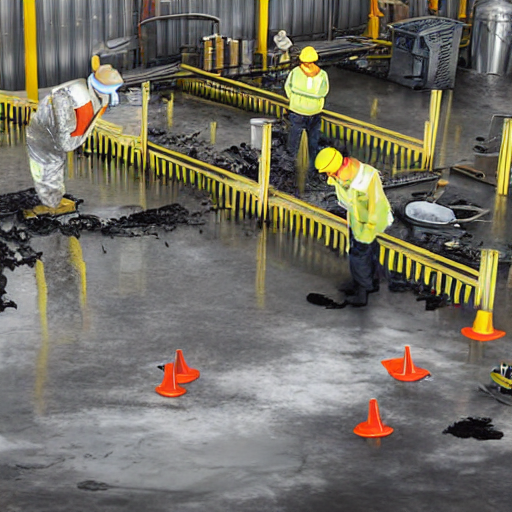

In [ ]:
# Import required libraries
from diffusers import StableDiffusionPipeline
import torch
from PIL import Image

# Define the model ID for Stable Diffusion v1.5
model_id = "runwayml/stable-diffusion-v1-5"

# Load the model and set it to use half precision (fp16) and the GPU
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16  # Use 16-bit floating point precision for memory efficiency
)

# Move the pipeline to the GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
pipe = pipe.to(device)

# Define the prompt for the image generation
# Define the prompt for the image generation
prompt = (
    "Generate a realistic scene depicting an oil spill in a busy industrial setting. "
    "The spill should cover a significant portion of the factory floor, creating a reflective surface. "
    "Workers in the background should be depicted wearing safety gear and operating heavy machinery, unaware of the hazard. "
    "The surrounding area should feature large steel structures and industrial equipment. "
    "The color of the spilled oil should contrast with the metallic tones of the environment. "
    "Reflections from overhead lights should be visible in the oil, adding to the realism. "
    "A caution sign should be placed near the spill, partially obscured by the spreading oil. "
    "The atmosphere should convey a sense of urgency and potential danger."
)


# Generate the image(s)
try:
    with torch.autocast("cuda"):  # Use mixed precision for faster and memory-efficient generation
        images = pipe(prompt, num_inference_steps=100, guidance_scale=10.0).images  # Adjusted parameters for better results

    # Display and save the generated images
    for i, img in enumerate(images):
        img.show()  # Display the image
        filename = f"OIL_SPILL_1_{i}.png"
        img.save(filename)  # Save the image to a file
        print(f"Image saved as {filename}")

except Exception as e:
    print(f"An error occurred during image generation: {e}")

# Optional: Function to display images inline in Jupyter Notebooks or Colab
def display_images(images):
    from IPython.display import display
    for img in images:
        display(img)

# Display the images inline if running in a Jupyter environment
display_images(images)
